# Author - Aditya Gupta

# Data Science and Business Analytics Internship

# GRIP THE SPARK FOUNDATION

# ###GRIPDEC'20

## Objective 1: Find out the most successful teams, players and factors contributing win or loss of a team. 

## Objective 2: Suggest teams or players a company should endorse for its products.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
mat1 = pd.read_csv('matches.csv')
mat1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
mat1.shape

(756, 18)

In [4]:
mat1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
mat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
# To sort out different datatypes  
list1 = []
list2 = []
list3 = []
for i in mat1:
    if mat1[i].dtype == ('object'):
        list1.append(i)
    if mat1[i].dtype == ('int64'):
        list2.append(i)
    else:
        list3.append(i)
print(list1)
print(list2)
print(list3)

['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets']
['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [7]:
mat1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Observations:

1. The .csv file has data of IPL matches starting from the season 2008 to 2019.

2. The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

3. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

4. 75% of the victorious teams that bat first won by a margin of 19 runs.

5. 75% of the victorious teams that bat second won by a margin of 6 wickets.

6. There were 756 IPL matches hosted from 2008 to 2019.

In [8]:
mat1['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [9]:
mat1['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [10]:
print(mat1['city'].unique())
print(mat1['city'].value_counts())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3

In [11]:
print(mat1['venue'].unique())
print(mat1['venue'].value_counts())

['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai Inte

In [12]:
print(mat1['team1'].unique())
print(mat1['team1'].value_counts())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [13]:
print(mat1['team2'].unique())
print(mat1['team2'].value_counts())

['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']
Kolkata Knight Riders          95
Royal Challengers Bangalore    95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Rising Pune Supergiants         7
Kochi Tuskers Kerala            7
Name: team2, dtype: int64


In [14]:
print(mat1['toss_winner'].unique())
print(mat1['toss_winner'].value_counts())

['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


In [15]:
print(mat1['toss_decision'].unique())
print(mat1['toss_decision'].value_counts())

['field' 'bat']
field    463
bat      293
Name: toss_decision, dtype: int64


In [16]:
print(mat1['result'].unique())
print(mat1['result'].value_counts())

['normal' 'tie' 'no result']
normal       743
tie            9
no result      4
Name: result, dtype: int64


In [17]:
print(mat1['winner'].unique())
print(mat1['winner'].value_counts())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Rising Pune Supergiants' 'Delhi Capitals']
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


In [18]:
print(mat1['player_of_match'].unique())
print(mat1['player_of_match'].value_counts())

['Yuvraj Singh' 'SPD Smith' 'CA Lynn' 'GJ Maxwell' 'KM Jadhav'
 'Rashid Khan' 'N Rana' 'AR Patel' 'SV Samson' 'JJ Bumrah' 'SP Narine'
 'KA Pollard' 'AJ Tye' 'RV Uthappa' 'CJ Anderson' 'BA Stokes'
 'NM Coulter-Nile' 'B Kumar' 'CH Gayle' 'KS Williamson' 'JC Buttler'
 'SK Raina' 'MJ McClenaghan' 'MS Dhoni' 'HM Amla' 'G Gambhir'
 'LH Ferguson' 'KH Pandya' 'Sandeep Sharma' 'DA Warner' 'RG Sharma'
 'Mohammed Shami' 'RA Tripathi' 'RR Pant' 'JD Unadkat' 'LMP Simmons'
 'DR Smith' 'S Dhawan' 'MM Sharma' 'SS Iyer' 'WP Saha' 'KK Nair'
 'Mohammed Siraj' 'AT Rayudu' 'HV Patel' 'Washington Sundar' 'KV Sharma'
 'BB McCullum' 'MEK Hussey' 'MF Maharoof' 'MV Boucher' 'DJ Hussey'
 'SR Watson' 'V Sehwag' 'ML Hayden' 'YK Pathan' 'KC Sangakkara' 'JDP Oram'
 'AC Gilchrist' 'SM Katich' 'ST Jayasuriya' 'GD McGrath' 'SE Marsh'
 'SA Asnodkar' 'R Vinay Kumar' 'IK Pathan' 'SM Pollock' 'Sohail Tanvir'
 'S Sreesanth' 'A Nehra' 'SC Ganguly' 'CRD Fernando' 'L Balaji'
 'Shoaib Akhtar' 'A Mishra' 'DPMD Jayawardene' 'GC S

In [19]:
print(mat1['umpire1'].unique())
print(mat1['umpire1'].value_counts())

['AY Dandekar' 'A Nand Kishore' 'Nitin Menon' 'AK Chaudhary' nan
 'A Deshmukh' 'KN Ananthapadmanabhan' 'YC Barde' 'S Ravi' 'CB Gaffaney'
 'M Erasmus' 'NJ Llong' 'CK Nandan' 'Asad Rauf' 'MR Benson' 'Aleem Dar'
 'SJ Davis' 'BF Bowden' 'IL Howell' 'DJ Harper' 'RE Koertzen'
 'BR Doctrove' 'AV Jayaprakash' 'BG Jerling' 'HDPK Dharmasena' 'S Asnani'
 'GAV Baxter' 'SS Hazare' 'K Hariharan' 'SL Shastri' 'SK Tarapore'
 'SJA Taufel' 'S Das' 'AM Saheba' 'PR Reiffel' 'JD Cloete' 'VA Kulkarni'
 'BNJ Oxenford' 'C Shamshuddin' 'RK Illingworth' 'RM Deshpande'
 'K Srinath' 'SD Fry' 'PG Pathak' 'K Bharatan' 'Chris Gaffaney'
 'Rod Tucker' 'Nigel Llong' 'Anil Chaudhary' 'K Ananthapadmanabhan'
 'O Nandan' 'A Nanda Kishore' 'Vineet Kulkarni' 'Bruce Oxenford'
 'Marais Erasmus' 'Kumar Dharmasena' 'Anil Dandekar' 'Yeshwant Barde'
 'Ian Gould' 'Ulhas Gandhe' 'Nanda Kishore' 'Sundaram Ravi']
HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
             

In [20]:
print(mat1['umpire2'].unique())
print(mat1['umpire2'].value_counts())

['NJ Llong' 'S Ravi' 'CK Nandan' 'C Shamshuddin' nan 'AK Chaudhary'
 'Nitin Menon' 'A Deshmukh' 'VK Sharma' 'M Erasmus' 'CB Gaffaney'
 'A Nand Kishore' 'RE Koertzen' 'SL Shastri' 'GA Pratapkumar' 'DJ Harper'
 'K Hariharan' 'RB Tiffin' 'AM Saheba' 'MR Benson' 'IL Howell'
 'AV Jayaprakash' 'I Shivram' 'BR Doctrove' 'BG Jerling' 'SJ Davis'
 'SD Ranade' 'SJA Taufel' 'TH Wijewardene' 'SK Tarapore' 'HDPK Dharmasena'
 'SS Hazare' 'PR Reiffel' 'AL Hill' 'RJ Tucker' 'VA Kulkarni' 'JD Cloete'
 'BNJ Oxenford' 'S Asnani' 'S Das' 'K Srinath' 'Subroto Das'
 'RK Illingworth' 'PG Pathak' 'K Srinivasan' 'SD Fry' 'A Nanda Kishore'
 'K Ananthapadmanabhan' 'A.D Deshmukh' 'Vineet Kulkarni' 'Chris Gaffaney'
 'Rod Tucker' 'Nigel Llong' 'Anil Chaudhary' 'O Nandan'
 'Virender Kumar Sharma' 'Yeshwant Barde' 'Anil Dandekar'
 'Kumar Dharmasena' 'KN Anantapadmanabhan' 'Ulhas Gandhe' 'Nanda Kishore'
 'Bruce Oxenford' 'Nand Kishore' 'KN Ananthapadmanabhan' 'Ian Gould']
C Shamshuddin       57
S Ravi              57
S

In [21]:
print(mat1['win_by_runs'].unique())
print(mat1['win_by_runs'].value_counts())

[ 35   0  15  97  17  51  27   5  21  14  26  82   3  61  48  19  12 146
   7   9  10  20   1 140  33   6  66  13  45  29  18  23  41  65  25 105
  75  92  11  24  38   8  78  16  53   2   4  31  55  98  34  36  39  40
  67  63  37  57  22  85  32  76 111  43  58  28  74  42  59  46  47  86
  44  87 130  60  77  30  50  93  72  62 138  71 144  80  64 102 118]
0      419
14      13
4       11
10      11
1       10
      ... 
64       1
66       1
67       1
72       1
146      1
Name: win_by_runs, Length: 89, dtype: int64


In [22]:
print(mat1['win_by_wickets'].unique())
print(mat1['win_by_wickets'].value_counts())

[ 0  7 10  6  9  4  8  5  2  3  1]
0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64


In [23]:
print(mat1['dl_applied'].unique())
print(mat1['dl_applied'].value_counts())
# (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

[0 1]
0    737
1     19
Name: dl_applied, dtype: int64


In [24]:
# Categorical Columns
cat_col = mat1.select_dtypes(include = ['object']).columns
mat1[cat_col].head(2)

,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [25]:
# Numerical Columns
num_col = mat1.select_dtypes(exclude = ['object']).columns
mat1[num_col].head(2)

,id,season,dl_applied,win_by_runs,win_by_wickets
0,1,2017,0,35,0
1,2,2017,0,0,7


## Missing Values Treatment

In [26]:
mat1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [27]:
mat1.isnull().sum()[mat1.isnull().sum()!=0]

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [28]:
mat1 = mat1.drop(['umpire3'], axis=1) # Removing the feature umpire3 as it has most missing values.

### The team with most number wins per season

In [29]:
# The team with most number wins per season
teams_per_season = mat1.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [30]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [31]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


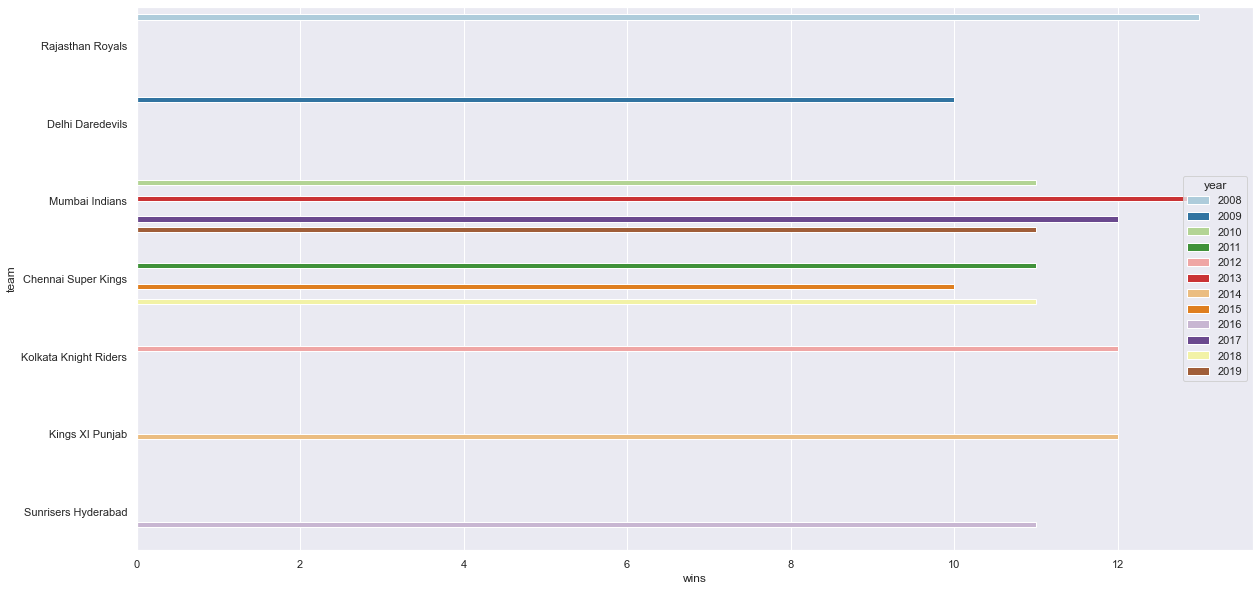

In [32]:
plt.figure(figsize = (20,10))
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired')
plt.show()
# Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

###  The venue that hosted maximum number of matches.

In [33]:
# The venue that hosted maximum number of matches.
venue_series = mat1['venue'].value_counts()

In [34]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_series.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

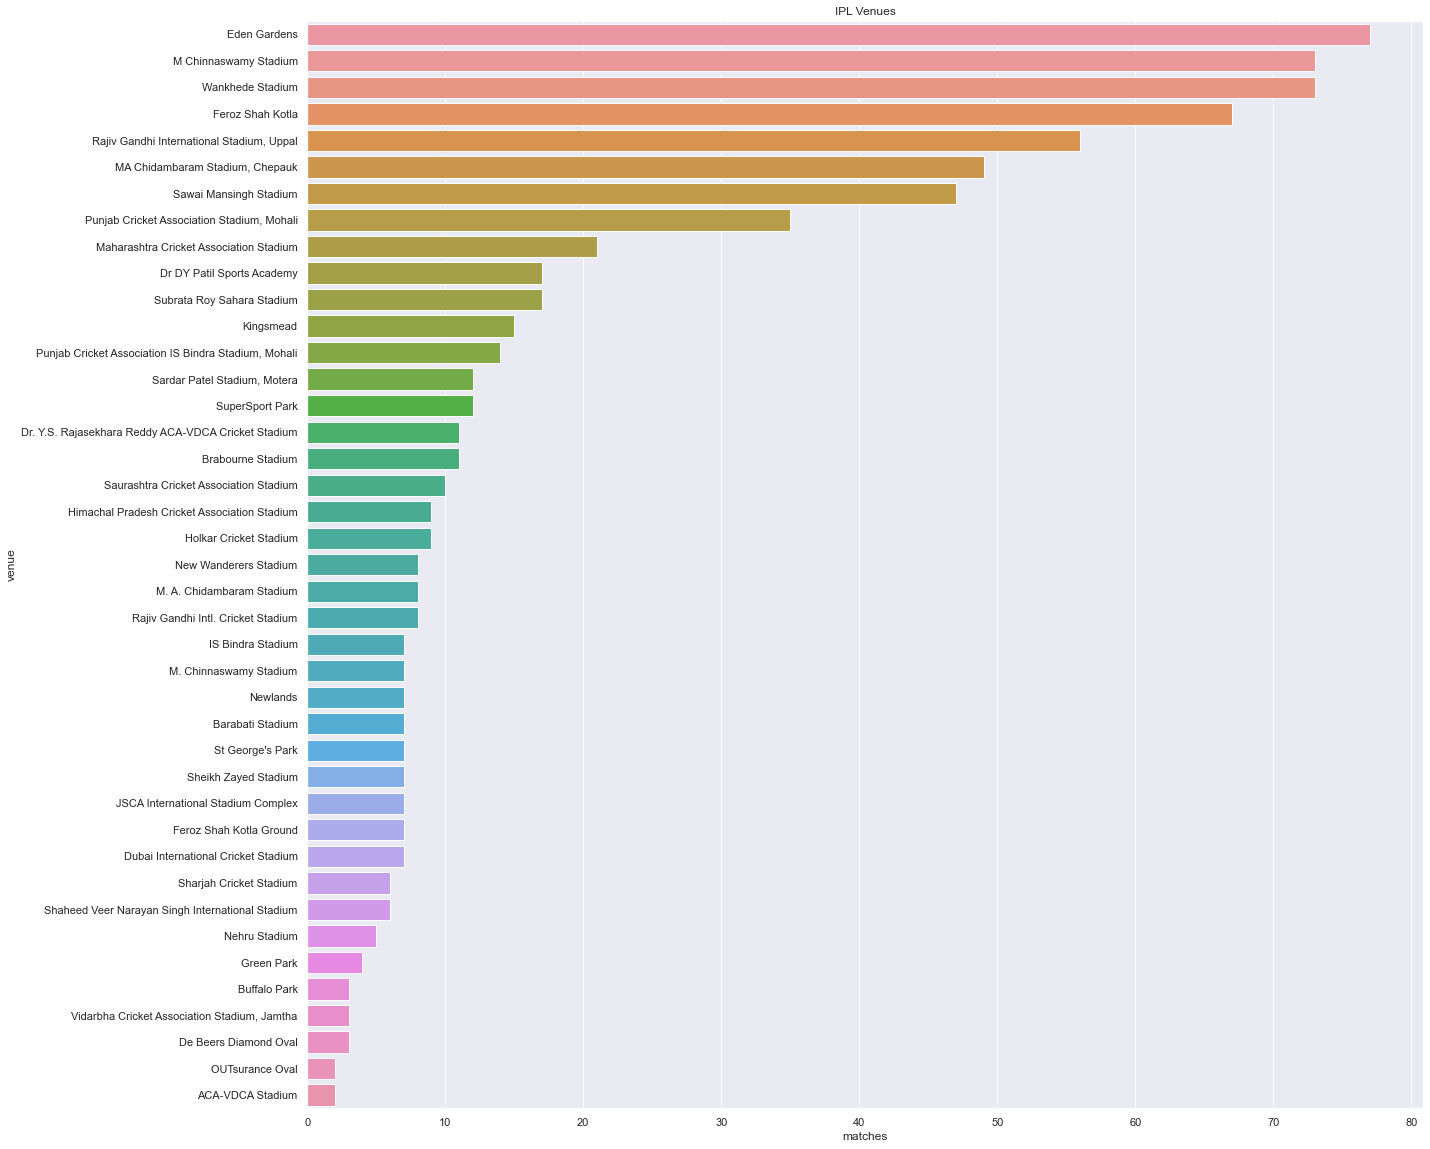

In [35]:
plt.figure(figsize = (20,20))
sns.barplot(x='matches', y='venue', data=venue_df)
plt.title("IPL Venues")
plt.show()

In [36]:
venue_df
# Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
# Till 2019, IPL matches were hosted by 40 venues

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


### The Most Successful IPL Team

In [37]:
# The Most Successful IPL Team
team_wins_series = mat1['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_series.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [38]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


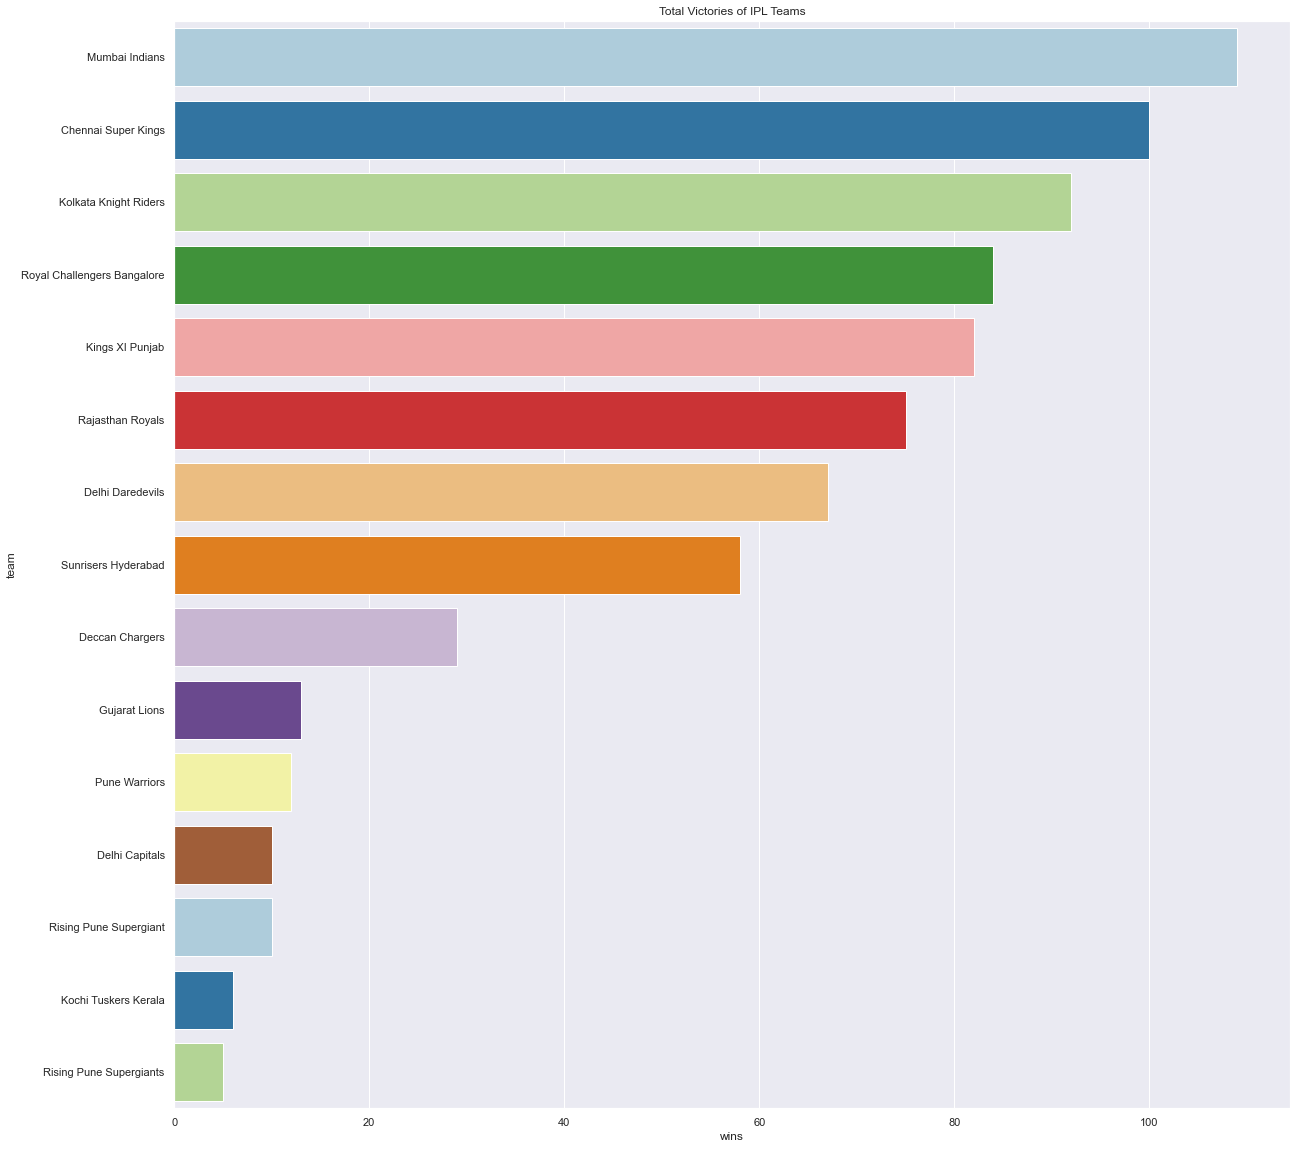

In [39]:
plt.figure(figsize = (20,20))
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired')
plt.title("Total Victories of IPL Teams")
plt.show()
# Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

### Most Valuable Player

In [40]:
# Most Valuable Player
mvp_series = mat1['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_series.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [41]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


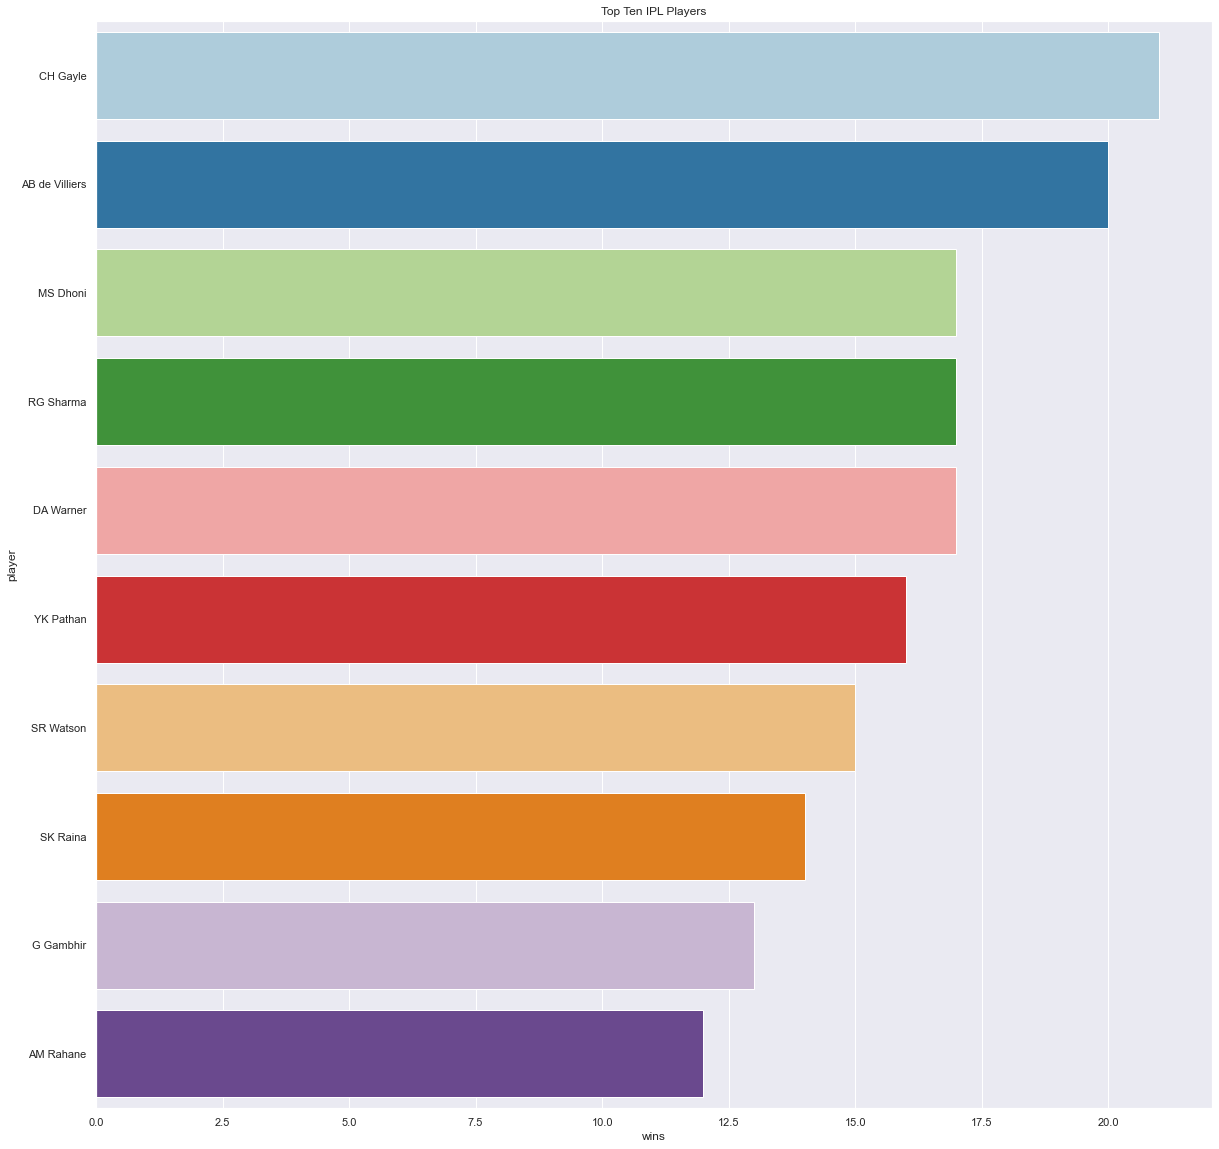

In [42]:
plt.figure(figsize = (20,20))
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired')
plt.title("Top Ten IPL Players")
plt.show()
# Chris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
# Six Indian players have figured in the top ten IPL players list.

### The team that won the most number of toss

In [43]:
# The team that won the most number of toss
toss_series = mat1['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_series.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [44]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


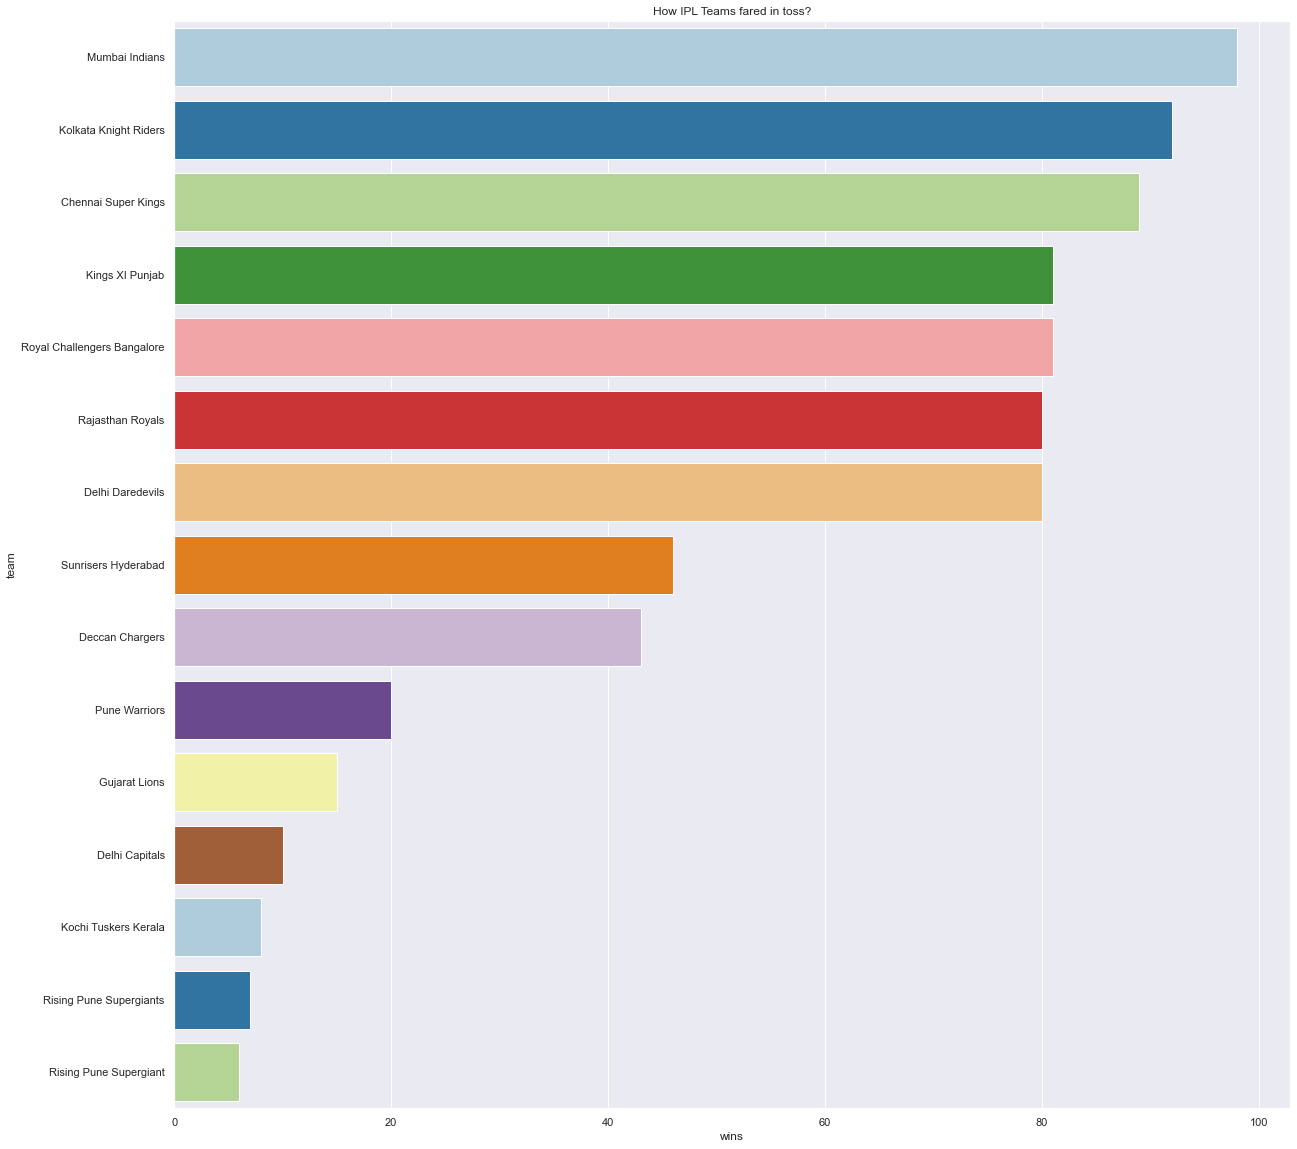

In [45]:
plt.figure(figsize = (20,20))
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired')
plt.title("How IPL Teams fared in toss?")
plt.show()
# Mumbai Indians has won the most toss(till 2019) in IPL history.
# All the top teams in IPL are successful in winning the toss as well.

### Umpire who has officiated the most number of IPL matches on field

In [46]:
# Umpire who has officiated the most number of IPL matches on field
umpire1_ser = mat1['umpire1'].value_counts()
umpire2_ser = mat1['umpire2'].value_counts()

In [47]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
KN Anantapadmanabhan,NaN,3.0
K Srinivasan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [48]:
umpire_series = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_series.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True)

In [49]:
umpire_df.sort_values('matches', ascending=False).head()
# S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
12,C Shamshuddin,73.0
3,AK Chaudhary,58.0
56,SJA Taufel,55.0


### Which team is the most successful team in the IPL?

In [50]:
# Which team is the most successful team in the IPL?
win_per_season_df
# Mumbai Indians secured the most number of wins(109) in IPL, followed by Chennai Super Kings.

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


In [51]:
team_wins_df
# Of all the IPL matches played till 2019, Mumbai Indians has emerged victorious in the most number of games. They have secured most wins in four seasons and have won four IPL trophies so far. Hence Mumbai Indians is the most successful team in IPL.

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


### Which city has hosted the maximum number of IPL matches.

In [52]:
# Which city has hosted the maximum number of IPL matches.
print(mat1['city'].value_counts())

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64


In [53]:
city_series = mat1['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_series.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

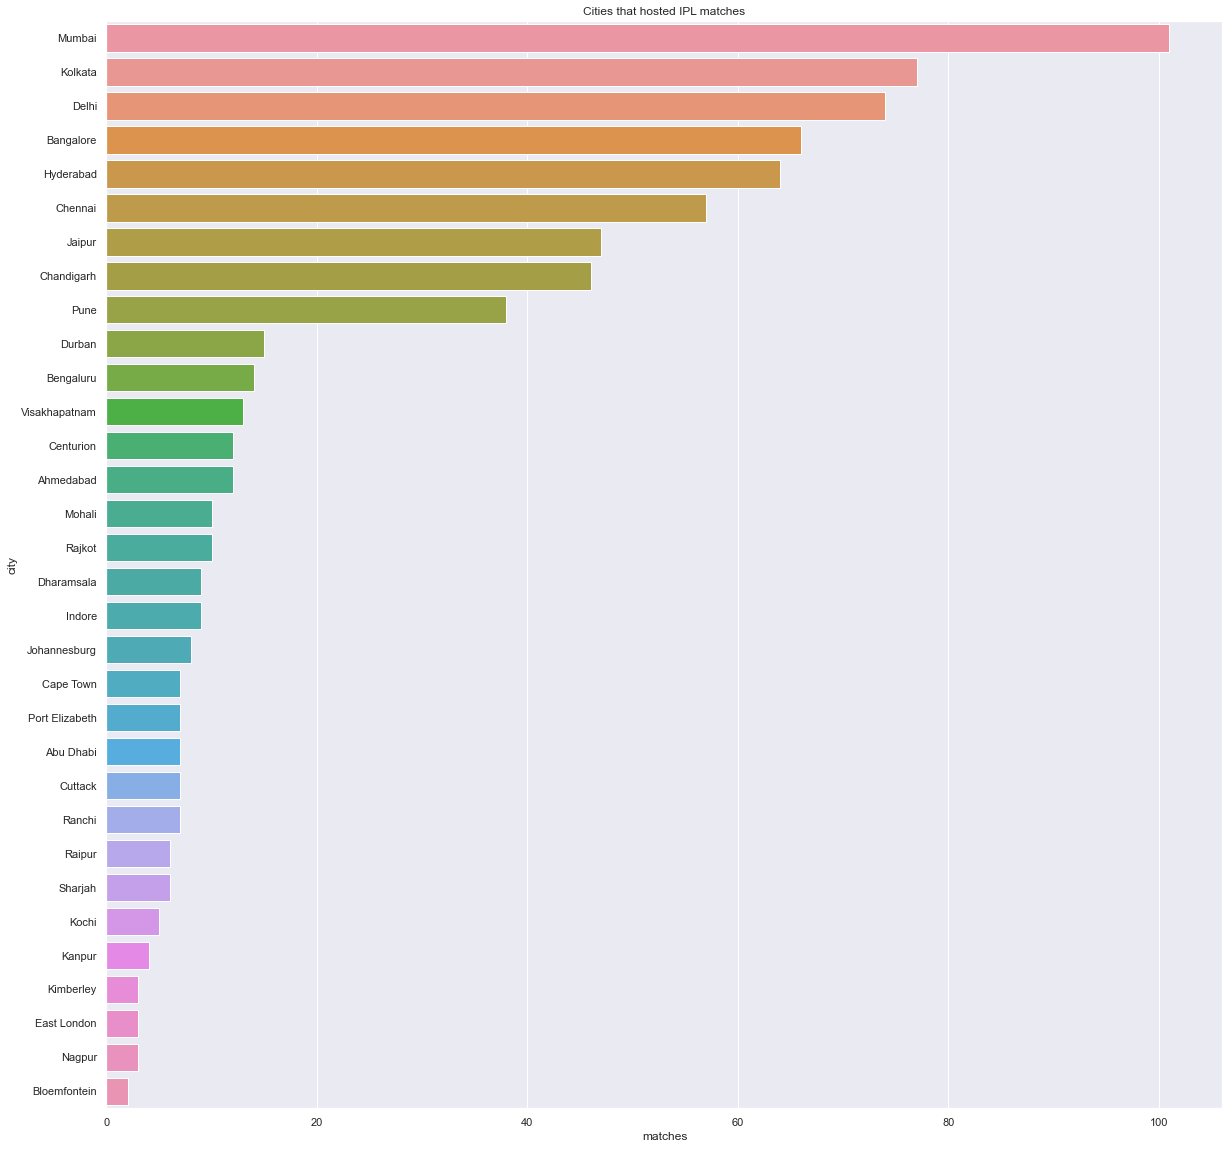

In [54]:
plt.figure(figsize = (20,20))
sns.barplot(x='matches', y='city', data=city_df)
plt.title("Cities that hosted IPL matches")
plt.show()
# The city of Mumbai has hosted the maximum number of IPL matches.

### Does winning the toss has any advantage?

In [55]:
# Does winning the toss has any advantage?
win_count = 0
for index, value in mat1.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(mat1)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

### Major Victories in IPL. Is it better to chase or defend in the IPL?

In [56]:
# Major Victories in IPL. Is it better to chase or defend in the IPL?
len(mat1)

756

In [57]:
defend_vict_series = mat1['win_by_runs'].value_counts()
defend_vict_series.sort_values(ascending=True)
# Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.
# When defending a total, the biggest victory was by 146 runs. Let’s find out that particular match.

146      1
98       1
77       1
93       1
102      1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [58]:
score = 146
for index, row in mat1.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  
# The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


In [59]:
chasing_vict_ser = mat1['win_by_wickets'].value_counts()
chasing_vict_ser
# Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

####  When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances and we can find the details about those matches:

In [60]:
# When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances and we can find the details about those matches:
for index, row in mat1.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

id                                        7941
season                                    2018
city                                    Indore
date                                  14/05/18
team1                          Kings XI Punjab
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                  0
win_by_wickets                              10
player_of_match                       UT Yadav
venue                   Holkar Cricket Stadium
umpire1                         Bruce Oxenford
umpire2                  Virender Kumar Sharma
Name: 683, dtype: object


In [61]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


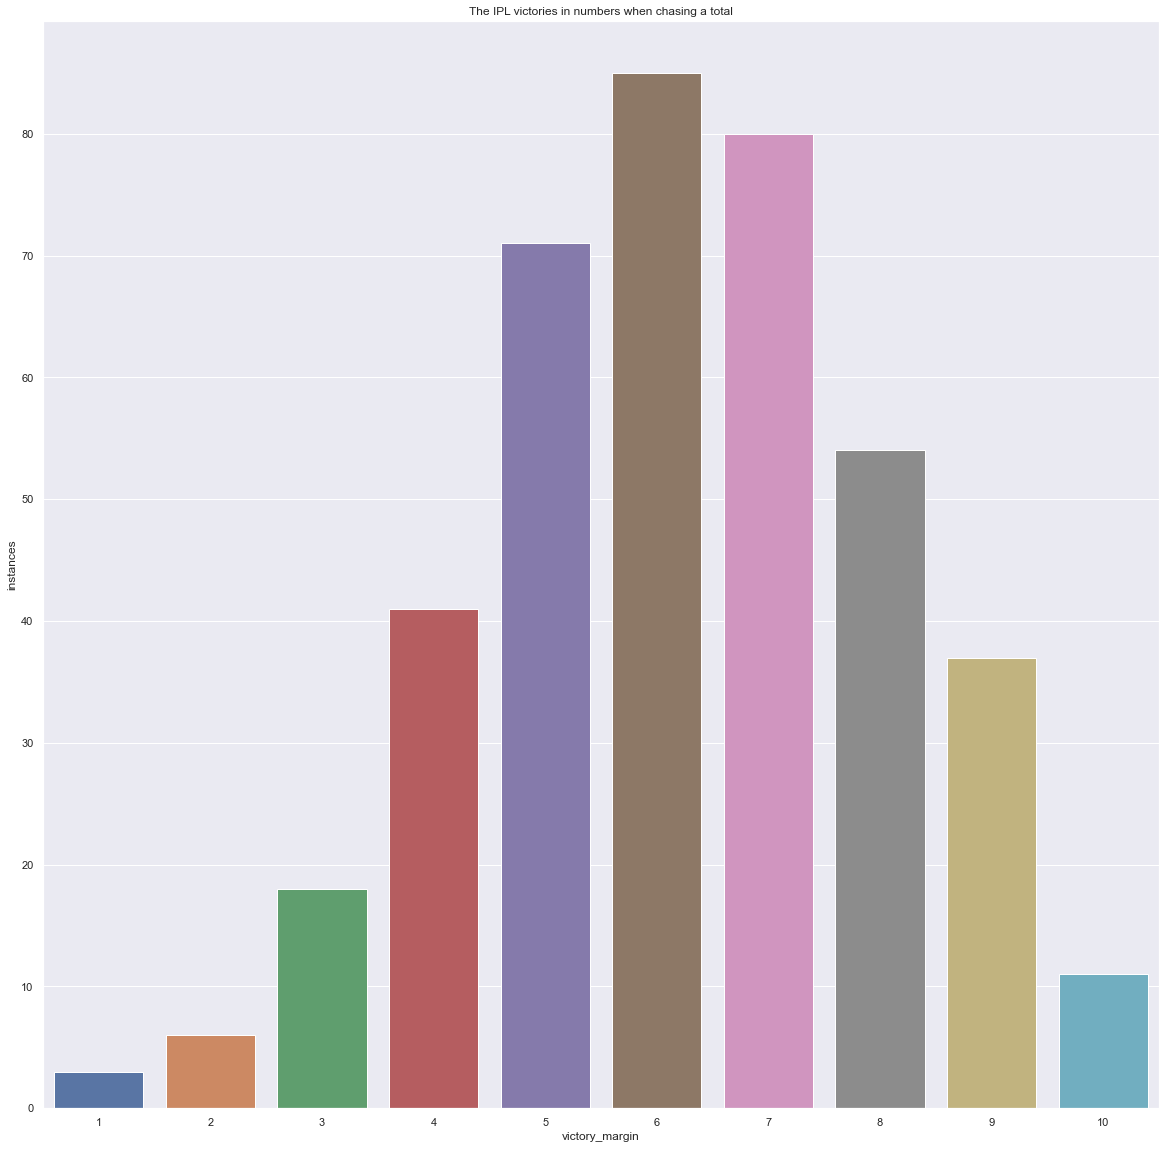

In [62]:
plt.figure(figsize = (20,20))
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2)
plt.title('The IPL victories in numbers when chasing a total')
plt.show()
# We can see that around 85 matches have been won by 6 wickets, 70 matches with 5 wickets, 80 matches with 7 wickets. We can also find that 10 matches have been won by 10 wickets meaning the opening batsmen were enough for the opponents.

We can see that around 85 matches have been won by 6 wickets, 70 matches with 5 wickets, 80 matches with 7 wickets. We can also find that 10 matches have been won by 10 wickets meaning the opening batsmen were enough for the opponents.

### Reading the Deliveries Dataset (deliveries.csv)

In [63]:
del1 = pd.read_csv('deliveries.csv')
del1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [64]:
del1.shape

(179078, 21)

In [65]:
del1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

data = pd.merge(left=mat1, right=del1, on='id', how='right')
data.head()

In [66]:
del1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [67]:
# To sort out different datatypes  
list1 = []
list2 = []
list3 = []
for i in del1:
    if del1[i].dtype == ('object'):
        list1.append(i)
    if del1[i].dtype == ('int64'):
        list2.append(i)
    else:
        list3.append(i)
print(list1)
print(list2)
print(list3)

['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']
['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']
['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']


In [68]:
del1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [69]:
print(del1['batting_team'].unique())
print(del1['batting_team'].value_counts())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64


In [70]:
print(del1['bowling_team'].unique())
print(del1['bowling_team'].value_counts())

['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
Mumbai Indians                 22517
Royal Challengers Bangalore    21236
Kolkata Knight Riders          20940
Kings XI Punjab                20782
Chennai Super Kings            19556
Delhi Daredevils               18725
Rajasthan Royals               17382
Sunrisers Hyderabad            12779
Deccan Chargers                 9039
Pune Warriors                   5457
Gujarat Lions                   3545
Delhi Capitals                  1963
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64


In [71]:
print(del1['batsman'].unique())
print(del1['batsman'].value_counts())

['DA Warner' 'S Dhawan' 'MC Henriques' 'Yuvraj Singh' 'DJ Hooda'
 'BCJ Cutting' 'CH Gayle' 'Mandeep Singh' 'TM Head' 'KM Jadhav'
 'SR Watson' 'Sachin Baby' 'STR Binny' 'S Aravind' 'YS Chahal' 'TS Mills'
 'A Choudhary' 'PA Patel' 'JC Buttler' 'RG Sharma' 'N Rana' 'AT Rayudu'
 'KH Pandya' 'KA Pollard' 'HH Pandya' 'TG Southee' 'AM Rahane'
 'MA Agarwal' 'SPD Smith' 'BA Stokes' 'MS Dhoni' 'JJ Roy' 'BB McCullum'
 'SK Raina' 'AJ Finch' 'KD Karthik' 'G Gambhir' 'CA Lynn' 'MK Tiwary'
 'DT Christian' 'HM Amla' 'M Vohra' 'WP Saha' 'AR Patel' 'GJ Maxwell'
 'DA Miller' 'Vishnu Vinod' 'Iqbal Abdulla' 'P Negi' 'AP Tare'
 'SW Billings' 'KK Nair' 'SV Samson' 'RR Pant' 'CH Morris' 'CR Brathwaite'
 'PJ Cummins' 'A Mishra' 'S Nadeem' 'Z Khan' 'DR Smith' 'DS Kulkarni'
 'P Kumar' 'Basil Thampi' 'RV Uthappa' 'MK Pandey' 'YK Pathan' 'SA Yadav'
 'CR Woakes' 'SP Narine' 'Harbhajan Singh' 'AB de Villiers' 'CJ Anderson'
 'F du Plessis' 'RA Tripathi' 'R Bhatia' 'DL Chahar' 'A Zampa' 'AB Dinda'
 'Imran Tahir' 'NV O

In [72]:
print(del1['non_striker'].unique())
print(del1['non_striker'].value_counts())

['S Dhawan' 'DA Warner' 'MC Henriques' 'Yuvraj Singh' 'DJ Hooda'
 'BCJ Cutting' 'Mandeep Singh' 'CH Gayle' 'TM Head' 'KM Jadhav'
 'SR Watson' 'Sachin Baby' 'STR Binny' 'S Aravind' 'TS Mills' 'YS Chahal'
 'A Choudhary' 'JC Buttler' 'PA Patel' 'RG Sharma' 'N Rana' 'AT Rayudu'
 'KH Pandya' 'KA Pollard' 'HH Pandya' 'TG Southee' 'MJ McClenaghan'
 'MA Agarwal' 'AM Rahane' 'SPD Smith' 'BA Stokes' 'MS Dhoni' 'BB McCullum'
 'JJ Roy' 'SK Raina' 'AJ Finch' 'KD Karthik' 'DR Smith' 'CA Lynn'
 'G Gambhir' 'MK Tiwary' 'DT Christian' 'R Bhatia' 'M Vohra' 'HM Amla'
 'WP Saha' 'AR Patel' 'GJ Maxwell' 'DA Miller' 'Vishnu Vinod' 'P Negi'
 'Iqbal Abdulla' 'SW Billings' 'AP Tare' 'KK Nair' 'SV Samson' 'RR Pant'
 'CH Morris' 'CR Brathwaite' 'PJ Cummins' 'A Mishra' 'Z Khan'
 'DS Kulkarni' 'P Kumar' 'Basil Thampi' 'MK Pandey' 'YK Pathan' 'SA Yadav'
 'CR Woakes' 'SP Narine' 'Harbhajan Singh' 'AB de Villiers' 'CJ Anderson'
 'F du Plessis' 'RA Tripathi' 'DL Chahar' 'A Zampa' 'AB Dinda'
 'Imran Tahir' 'NV Ojha' 'V

In [73]:
print(del1['bowler'].unique())
print(del1['bowler'].value_counts())

['TS Mills' 'A Choudhary' 'YS Chahal' 'S Aravind' 'SR Watson' 'TM Head'
 'STR Binny' 'A Nehra' 'B Kumar' 'BCJ Cutting' 'Rashid Khan' 'DJ Hooda'
 'MC Henriques' 'Bipul Sharma' 'AB Dinda' 'DL Chahar' 'BA Stokes'
 'Imran Tahir' 'A Zampa' 'R Bhatia' 'TG Southee' 'HH Pandya'
 'MJ McClenaghan' 'JJ Bumrah' 'KH Pandya' 'KA Pollard' 'TA Boult'
 'PP Chawla' 'SP Narine' 'CR Woakes' 'Kuldeep Yadav' 'YK Pathan' 'P Kumar'
 'DS Kulkarni' 'MS Gony' 'S Kaushik' 'DR Smith' 'SB Jakati'
 'Sandeep Sharma' 'MM Sharma' 'AR Patel' 'T Natarajan' 'MP Stoinis'
 'Swapnil Singh' 'DT Christian' 'RD Chahar' 'Z Khan' 'CH Morris'
 'PJ Cummins' 'S Nadeem' 'A Mishra' 'CR Brathwaite' 'B Stanlake'
 'Iqbal Abdulla' 'P Negi' 'SK Raina' 'Tejas Baroka' 'Basil Thampi'
 'SL Malinga' 'Harbhajan Singh' 'AS Rajpoot' 'VR Aaron' 'CJ Anderson'
 'Mustafizur Rahman' 'UT Yadav' 'C de Grandhomme' 'I Sharma' 'GJ Maxwell'
 'S Badree' 'AJ Tye' 'RA Jadeja' 'Ankit Sharma' 'LH Ferguson' 'SN Thakur'
 'KC Cariappa' 'MM Patel' 'AF Milne' 'JD Unad

In [74]:
print(del1['inning'].unique())
print(del1['inning'].value_counts())

[1 2 3 4 5]
1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64


In [75]:
print(del1['is_super_over'].unique())
print(del1['is_super_over'].value_counts())

[0 1]
0    178997
1        81
Name: is_super_over, dtype: int64


In [76]:
print(del1['wide_runs'].unique())
print(del1['wide_runs'].value_counts())

[0 2 1 5 3 4]
0    173673
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64


In [77]:
print(del1['bye_runs'].unique())
print(del1['bye_runs'].value_counts())

[0 1 4 2 3]
0    178598
1       324
4       123
2        31
3         2
Name: bye_runs, dtype: int64


In [78]:
print(del1['legbye_runs'].unique())
print(del1['legbye_runs'].value_counts())

[0 1 2 5 3 4]
0    176141
1      2558
4       220
2       138
3        17
5         4
Name: legbye_runs, dtype: int64


In [79]:
print(del1['noball_runs'].unique())
print(del1['noball_runs'].value_counts())

[0 1 2 5 3]
0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64


In [80]:
print(del1['penalty_runs'].unique())
print(del1['penalty_runs'].value_counts())

[0 5]
0    179076
5         2
Name: penalty_runs, dtype: int64


In [81]:
print(del1['batsman_runs'].unique())
print(del1['batsman_runs'].value_counts())

[0 4 1 6 3 2 5 7]
0    70845
1    67523
4    20392
2    11471
6     8170
3      587
5       79
7       11
Name: batsman_runs, dtype: int64


In [82]:
print(del1['extra_runs'].unique())
print(del1['extra_runs'].value_counts())

[0 2 1 4 5 3 7]
0    169541
1      8495
2       407
4       348
5       219
3        67
7         1
Name: extra_runs, dtype: int64


In [83]:
print(del1['total_runs'].unique())
print(del1['total_runs'].value_counts())

[ 0  4  2  1  6  3  5  7 10  8]
1     73059
0     63002
4     20599
2     13125
6      8148
3       688
5       339
8        64
7        38
10       16
Name: total_runs, dtype: int64


In [84]:
# Categorical Columns
cat_col = del1.select_dtypes(include = ['object']).columns
del1[cat_col].head(2)

,batting_team,bowling_team,batsman,non_striker,bowler,player_dismissed,dismissal_kind,fielder
0,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,NaN,NaN,NaN
1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,NaN,NaN,NaN


In [85]:
# Numerical Columns
num_col = del1.select_dtypes(exclude = ['object']).columns
del1[num_col].head(2)

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,1,1,1,2,0,0,0,0,0,0,0,0,0


## Missing Values Treatment

In [86]:
del1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [87]:
del1.isnull().sum()[del1.isnull().sum()!=0]

player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Maximum Runs scored by different players in an inning.

In [88]:
# Maximum Runs scored by different players in an inning
batting_ings = del1.groupby(['match_id','batsman']).apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
sorted_batting_ings = batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores = sorted_batting_ings[:10] 
ball_faced = del1.groupby(['match_id','batsman']).apply(lambda x : x['batsman_runs'].count()).reset_index(name='Balls Faced')

In [89]:
batsmen_performance = pd.merge(top_batsmen_scores, ball_faced, how='inner', left_on=['match_id','batsman'], right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match'] = batsmen_performance['Innings Runs']*100 / batsmen_performance['Balls Faced']
batsmen_innings = pd.merge(batsmen_performance, del1, how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_table = batsmen_innings.iloc[:,1:8]
batsmen_innings_table2 = batsmen_innings_table.drop_duplicates()
batsmen_innings_table2

,batsman,Innings Runs,Balls Faced,Strike Rate for Match,inning,batting_team,bowling_team
0,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors
69,BB McCullum,158,77,205.194805,1,Kolkata Knight Riders,Royal Challengers Bangalore
146,AB de Villiers,133,61,218.032787,1,Royal Challengers Bangalore,Mumbai Indians
207,RR Pant,130,64,203.125000,1,Delhi Daredevils,Sunrisers Hyderabad
271,AB de Villiers,129,53,243.396226,1,Royal Challengers Bangalore,Gujarat Lions
324,CH Gayle,128,62,206.451613,1,Royal Challengers Bangalore,Delhi Daredevils
386,M Vijay,127,57,222.807018,1,Chennai Super Kings,Rajasthan Royals
443,DA Warner,126,60,210.000000,1,Sunrisers Hyderabad,Kolkata Knight Riders
503,V Sehwag,122,62,196.774194,1,Kings XI Punjab,Chennai Super Kings
565,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad


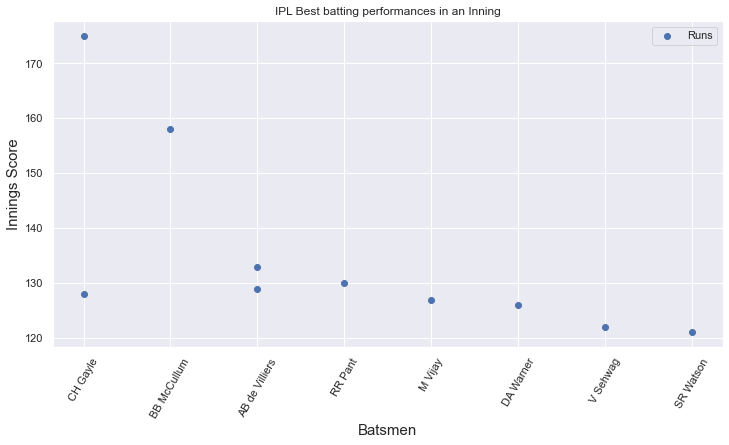

In [90]:
x=batsmen_innings_table2['batsman']
y1=batsmen_innings_table2['Innings Runs']
plt.figure(figsize=(12,6))
plt.scatter(x,y1)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Innings Score',size=15)
plt.title('IPL Best batting performances in an Inning')
plt.xticks(rotation=60)
plt.legend(['Runs']);
# We can see that Chris Gayle is the one who has scored the maximum runs(175*) in a match followed by Brendon McCullum and AB de Villiers.

### Maximum wickets taken by bowlers in last 12 seasons

In [91]:
# Maximum wickets taken by bowlers in last 12 seasons
bowling_wickets = del1[del1['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:10]
top_bowlers
# Since, run outs are not counted in the bowlers account, we can discard all those such dismissals.

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


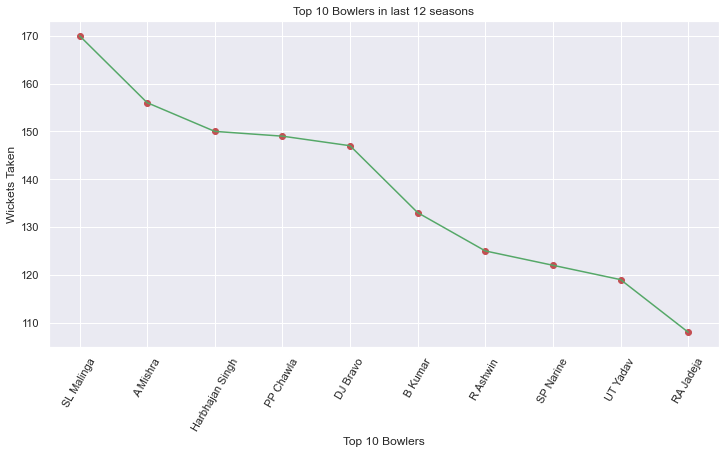

In [92]:
plt.figure(figsize=(12,6))
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r');
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g');
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top 10 Bowlers in last 12 seasons')
plt.show()
# Lasith Malinga, the Sri Lankan fast bowler, has taken the maximum number(170) wickets in the last 12 seasons of the IPL, followed by Amit Mishra and Harbhajan Singh.

### Matches Played vs Matches Won

In [93]:
# Matches Played vs Matches Won
matches_played=pd.concat([mat1['team1'],mat1['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=mat1['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

In [94]:
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,13


In [95]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Kings XI Punjab                47.7
Chennai Super Kings            50.0
Delhi Daredevils               46.6
Rajasthan Royals               45.6
Sunrisers Hyderabad            53.7
Deccan Chargers                38.7
Pune Warriors                  28.3
Gujarat Lions                  40.0
Delhi Capitals                 62.5
Rising Pune Supergiant         62.5
Rising Pune Supergiants        42.9
Kochi Tuskers Kerala           35.7
dtype: float64

We can see the Win percentage of each team. When we look at it closely, we find that Delhi Capitals has the best stats. But when we see the number of matches played by Delhi Capitals, we find that it is quite low as compared with the other teams. This is so because earlier Delhi used to play with the name of Delhi Daredevils and then renamed to Delhi Capitals.

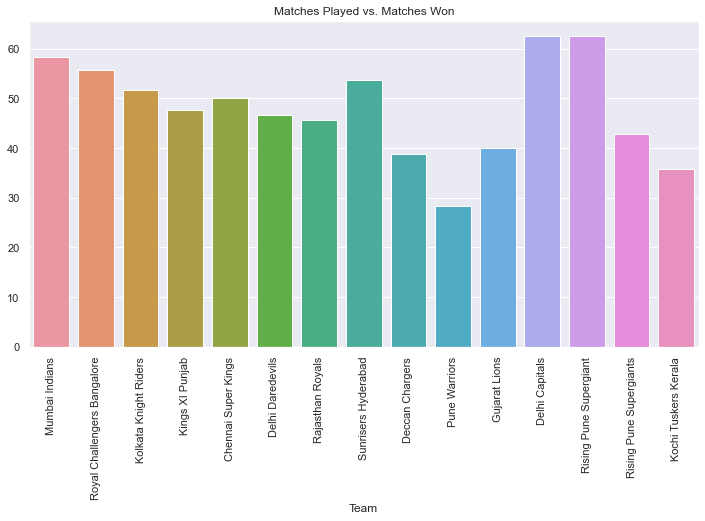

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(matches_played['Total Matches'].index, win_percentage)
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
plt.show()

In this graph, we can clearly see that Delhi Capitals has the best stats. But now that we know the reason, we can say that Mumbai Indians have the best winning percentage as compared to other teams.

### Maximum Runs scored by a team

In [97]:
# Maximum Runs scored by a team
high_scores = del1.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


Royal Challengers Bangalore has scored the maximum runs in one innings against Pune Warriors India, followed by Kolkata Knight Riders against Kings XI Punjab and then again Royal Challengers Bangalore against Gujarat Lions.

Well, the match in which RCB scored 263 runs is the same match win which Chris Gayle scored unbeated 175.

### Which player has become the Man of the Match most number of times?

In [98]:
# Which player has become the Man of the Match most number of times?
man1 = mat1.player_of_match.value_counts()
man1
# The GayleStorm Chris Gayle has become Man of the Match most number of times, followed by Mr. 360 AB de Villiers, our very own Hitman Rohit Sharma, Thalaiva MS Dhoni and Reverend David Warner.

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
K Ahmed            1
SW Billings        1
YS Chahal          1
GJ Bailey          1
HH Gibbs           1
Name: player_of_match, Length: 226, dtype: int64

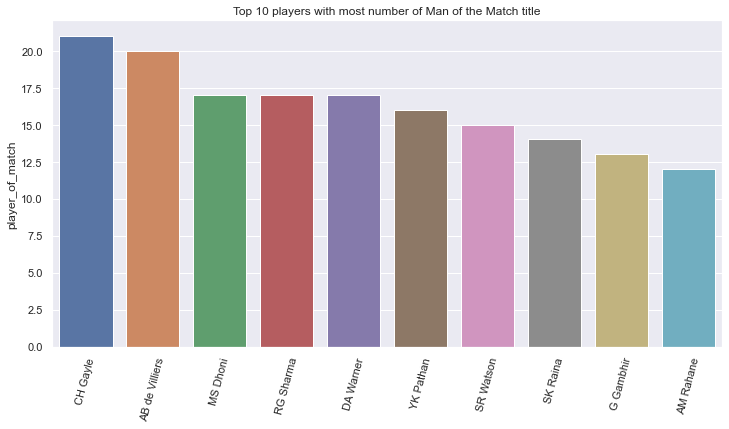

In [99]:
man10 = man1[:10]
plt.figure(figsize=(12,6))
sns.barplot(man10.index, man10)
plt.xticks(rotation=75)
plt.title('Top 10 players with most number of Man of the Match title')
plt.show()

### Top 5 scoring batsman

In [100]:
# Top 5 scoring batsman
batsmen = del1.groupby('batsman').apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted=batsmen.sort_values(by='Runs',ascending=False)
top_batsmen=batsmen_sorted[:5]
top_batsmen

,batsman,Runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632


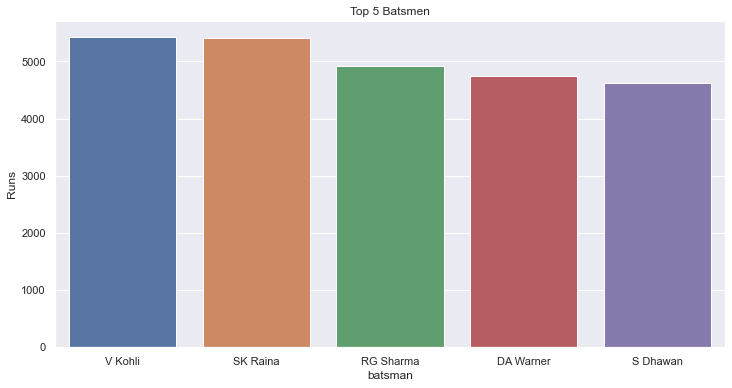

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(top_batsmen['batsman'],top_batsmen['Runs'])
plt.title('Top 5 Batsmen')
plt.show()

Virat Kohli has scored 5434 runs in total, followed by Suresh Raina with slightly less 5415 runs and Rohit Sharma with 4914 runs.

### Maximum runs by which a team won.

In [102]:
# Maximum runs by which a team won.
batting_first_team = mat1[mat1.win_by_runs != 0]
batting_first_team.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


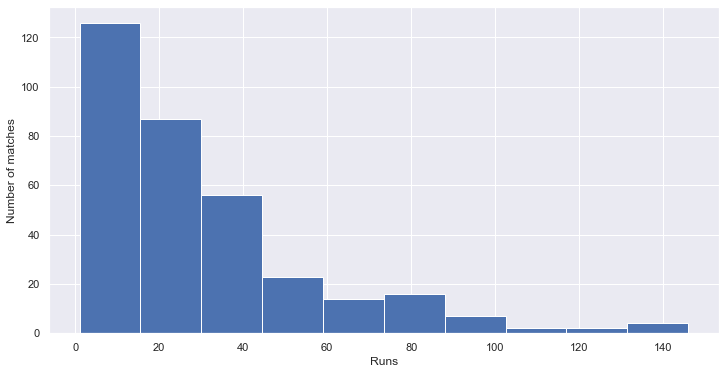

In [103]:
plt.figure(figsize=(12,6))
plt.hist(batting_first_team['win_by_runs'])
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.show()

We can see that in almost around 140 matches, teams have won with a margin of 0-20 runs whereas only one or two team has won match with a margin of 120-140 runs. 

## Insights and Conclusion

1. The files has data of IPL matches starting from the season 2008 to 2019.

2. The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

3. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

4. 75% of the victorious teams that bat first won by a margin of 19 runs.

5. 75% of the victorious teams that bat second won by a margin of 6 wickets.

6. There were 756 IPL matches hosted from 2008 to 2019.

7. Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

8. Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.Till 2019, IPL matches were hosted by 40 venues

9. Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

10. Chris Gayle is the player who won the most player of the match awards and hence is the most valuable player. Six Indian players have figured in the top ten IPL players list.

11. Mumbai Indians has won the most toss(till 2019) in IPL history. All the top teams in IPL are successful in winning the toss as well.

12. S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

13. Mumbai Indians secured the most number of wins(109) in IPL, followed by Chennai Super Kings.

14. Of all the IPL matches played till 2019, Mumbai Indians has emerged victorious in the most number of games. They have secured most wins in four seasons and have won four IPL trophies so far. Hence Mumbai Indians is the most successful team in IPL.

15. The city of Mumbai has hosted the maximum number of IPL matches.

16. The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

17. Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.When defending a total, the biggest victory was by 146 runs.

18. The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.

19. Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.

20. When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances and we can find the details about those matches by the following code snippet:

21. We can see that around 85 matches have been won by 6 wickets, 70 matches with 5 wickets, 80 matches with 7 wickets. We can also find that 10 matches have been won by 10 wickets meaning the opening batsmen were enough for the opponents.

22. We can see that Chris Gayle is the one who has scored the maximum runs(175*) in a match followed by Brendon McCullum and AB de Villiers.

23. Lasith Malinga, the Sri Lankan fast bowler, has taken the maximum number(170) wickets in the last 12 seasons of the IPL, followed by Amit Mishra and Harbhajan Singh.

24. The GayleStorm Chris Gayle has become Man of the Match most number of times, followed by Mr. 360 AB de Villiers, our very own Hitman Rohit Sharma, Thalaiva MS Dhoni and Reverend David Warner.

25. Virat Kohli has scored 5434 runs in total, followed by Suresh Raina with slightly less 5415 runs and Rohit Sharma with 4914 runs.

###  Objective 1: Find out the most successful teams, players and factors contributing win or loss of a team. 

1.  Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

2. Virat Kohli is called the Run Machine. He has scored 5434 runs in total, followed by Suresh Raina with slightly less 5415 runs and Rohit Sharma with 4914 runs.

3. Lasith Malinga, the Sri Lankan fast bowler, has taken the maximum number(170) wickets in the last 12 seasons of the IPL, followed by Amit Mishra and Harbhajan Singh.

4. The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

5. Off the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.When defending a total, the biggest victory was by 146 runs.

### Objective 2: Suggest teams or players a company should endorse for its products.

1. Mumbai Indians is the most successful team followed by Chennai Super Kings and Kolkata Knight Riders.

2. Virat Kohli, Suresh Raina, Rohit Sharma, Lasith Malinga, Amit MIshra, Harbhajan Singh, Chris Gayle, Ab de Villiers, David Warner, etc can be considered for endorsement.